# Домашнее задание №3

In [75]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [76]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [77]:
d_bill = data.Direct_Bilirubin
t_bill = data.Total_Bilirubin

d_bill = np.array(d_bill).reshape(-1,1)
t_bill = np.array(t_bill).reshape(-1,1)

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    d_bill,
    t_bill,
    test_size = 0.2
)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

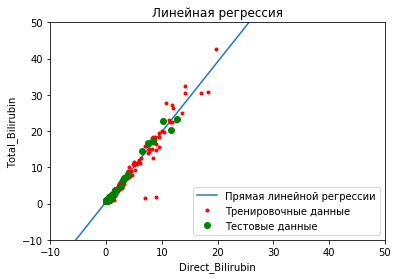

In [80]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(-10, 50, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-10,50)
plt.ylim(-10,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

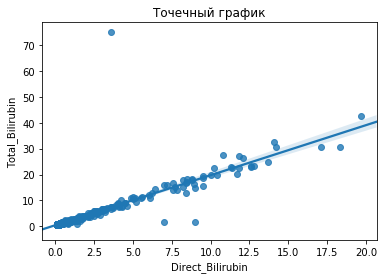

In [81]:
d_bill = data.Direct_Bilirubin
t_bill = data.Total_Bilirubin
sns.regplot(x= d_bill, y= t_bill ,data=data, fit_reg=True)

plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')

plt.title('Точечный график')
plt.show()

Пример, как считать квантили:

In [82]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

NameError: name 'age' is not defined

Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [83]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [84]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

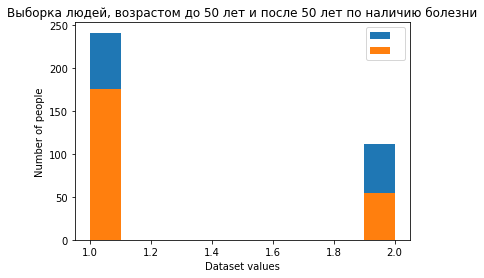

Категория до 50 лет: Среднее значение Dataset  1.3172804532577904  Квартиль 50%   1.0
Категория старше 50 лет: Среднее значение Dataset  1.2391304347826086 Квартиль 50%  1.0


In [85]:
#thalach_small = data[data['age']<=40]['thalach']
#trestbps_small = data[data['age']<=40]['trestbps']
before_50= data[data['Age']<50]['Dataset']
after_50= data[data['Age']>=50]['Dataset']


#liver_disease
#no_disease

plt.hist(before_50)
plt.hist(after_50)
plt.xlabel('Dataset values')
plt.ylabel('Number of people')
plt.legend('  ')
plt.title('Выборка людей, возрастом до 50 лет и после 50 лет по наличию болезни')
plt.show()

print('Категория до 50 лет: Среднее значение Dataset ', before_50.mean(),' Квартиль 50%  ',before_50.quantile(.5))
print('Категория старше 50 лет: Среднее значение Dataset ', after_50.mean(),'Квартиль 50% ',after_50.quantile(.5))


#Средние значения зоворят о том что в группе до 50 лет в среднем больных меньше чем в группе старше 50 лет,  
#и в обеих группах их меньше 50% от выборки

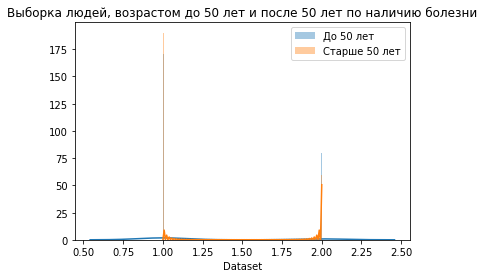

In [94]:
sns.distplot(before_50,250)
sns.distplot(after_50, 250)
plt.title('Выборка людей, возрастом до 50 лет и после 50 лет по наличию болезни')
plt.legend(['До 50 лет', 'Старше 50 лет'])
plt.show()


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [64]:
t_bill_1 = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(t_bill_1, data['Total_Bilirubin'].mean())

#Значение P меньше 0,05 говорит  о том что нулевую гипотезу, предполагающую отсутствие отличий выборки
#от генеральной совокупности, необходимо отвергнуть. 

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [98]:
t_bill_1 = data[data['Dataset']==1]['Total_Bilirubin']
t_bill_2 = data[data['Dataset']==2]['Total_Bilirubin']
print('Количество больных всего ', len(data[data['Dataset']==1]) )
print('Количество здоровых всего ', len(data[data['Dataset']==2]) )
#print('критерий t для больных:',stats.ttest_1samp(t_bill_1, data['Total_Bilirubin'].mean()))
#print('критерий t для здоровых:',stats.ttest_1samp(t_bill_2, data['Total_Bilirubin'].mean()))
print('Двухвыборочный t-критерий для выборок больных и здоровых ',stats.ttest_ind(t_bill_1,t_bill_2))
#Высокое значение p говорит о том что мы подтверждаем нулевую теорию о том что нет различий между выборками
#в показателе Total_Bilirubin то есть по указанному показатнлю группы 

Количество больных всего  416
Количество здоровых всего  167
Двухвыборочный t-критерий для выборок больных и здоровых  Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)


Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [74]:
age_g1 = data[data['Age']<30]['Dataset']

age_g2 = data[data['Age']<55]['Dataset']

age_g3 = data[data['Age']>=55]['Dataset']

stats.f_oneway(age_g1, age_g2, age_g3)

#Низкий p-palue (меньше 0,05) говорит о том что данные группы не имеют статистической схожести.

F_onewayResult(statistic=6.920077294006607, pvalue=0.0010582949659852085)

Вопросы задавать на почту yustiks@gmail.com